# HW3-2: MNIST 手写数字识别 （80分）

- 本次作业的主题是使用深度学习技术对`MNIST`手写数字数据集进行分类。
- 要求使用两种不同的深度学习模型，分别是多层感知机--`MLP`和卷积神经网络--`CNN`。
- 本次作业的目的是让同学们了解深度学习模型的构建和训练过程，以及对经典视觉任务处理效果的对比。

## 评分标准（更细致的评分标准见对应部分）

- 数据读取和预处理：5分
- 基于`MLP`的手写数字分类：30分 
- 基于`CNN`的手写数字分类：30分
- 结果讨论与对比分析：15分


---

## 第一部分：数据读取和预处理

你可以在Canvas上下载如下两个文件：
- 训练数据：`mnist_train.csv`
- 测试数据：`mnist_test.csv`

这两个文件包含了Mnist数据集的训练集和测试集。每一行的第一个数字表示标签，后面的784数字是28x28的图片像素值。
- 请你正确读取并分别展示训练集和测试集的第一个样本（图像+label）。

### 评分细则
- 数据读取：2分
- 数据展示：3分

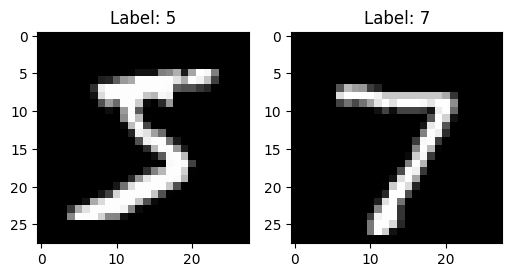

In [2]:
# Code Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# Load the data
with open('mnist_train.csv','r') as f:
    train_data = list(csv.reader(f))

with open('mnist_test.csv','r') as f:
    test_data = list(csv.reader(f))


train_label = train_data[0][0]
train_image = np.array(train_data[0][1:]).reshape(28,28).astype(float)
test_label = test_data[0][0]
test_image = np.array(test_data[0][1:]).reshape(28,28).astype(float)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(train_image, cmap='gray')
plt.title('Label: ' + train_label)
plt.subplot(1,2,2)
plt.imshow(test_image, cmap='gray')
plt.title('Label: ' + test_label)
plt.show()

---
## 第二部分：基于`MLP`的手写数字分类

- 请你构建一个多层感知机模型，在Mnist数据集上进行训练和测试。
- 可以使用`Pytorch`或者`Tensorflow`等深度学习框架。
- 请你展示模型的训练过程（Loss曲线）和测试结果（分类精度）。

### 评分细则
- 模型构建：10分
- 模型训练：10分 - 要求Loss曲线收敛
- 模型测试：10分 - 要求分类精度达到90%以上

In [3]:
# Code here
from data import LoadData
from MLP import MLP
import torch.nn as nn
import torch
from tqdm import tqdm
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from time import time

train_data = LoadData(train=True)
test_data = LoadData(train=False)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

model = MLP()

n_epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

best_loss = 1e5
losses = []

start_time = time()
for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for i, (images, labels) in tqdm(enumerate(train_loader)):
        optimizer.zero_grad()  # Assuming 'optimizer' is defined
        predictions = model(images)
        loss = criterion(predictions, labels)  # Assuming 'loss_function' is defined
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    average_train_loss = train_loss / len(train_data)
    losses.append(average_train_loss)
    print(f"Epoch {epoch+1}, Loss: {average_train_loss}")

    if train_loss < best_loss:
        best_loss = train_loss
        torch.save(model.state_dict(), 'best_model_mlp.pth')
end_time = time()
print(f"Training time mlp: {end_time - start_time}")

model.load_state_dict(torch.load('best_model_mlp.pth'))
model.eval()
test_failures = 0
for i, (images, labels) in tqdm(enumerate(test_loader)):
    predictions = model(images)
    test_failures += sum(predictions.argmax(1) != labels).item()

test_accuracy = 1 - test_failures / len(test_data)
print(f"MLP Test accuracy: {100*test_accuracy:.2f}%") 
# epoch     accuracy
# 10         98.16%

d:\ProgramData\Anaconda3\envs\py39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
1875it [00:07, 267.46it/s]


Epoch 1, Loss: 0.00961988487932831


1875it [00:05, 315.27it/s]


Epoch 2, Loss: 0.004241072394671695


1875it [00:05, 317.13it/s]


Epoch 3, Loss: 0.003154265162185766


1875it [00:05, 318.21it/s]


Epoch 4, Loss: 0.0026925112660974265


1875it [00:06, 307.31it/s]


Epoch 5, Loss: 0.002251749200890966


1875it [00:06, 296.65it/s]


Epoch 6, Loss: 0.00203506581329954


1875it [00:06, 305.80it/s]


Epoch 7, Loss: 0.0018196026765025938


1875it [00:06, 305.11it/s]


Epoch 8, Loss: 0.0016780347632236953


1875it [00:06, 299.02it/s]


Epoch 9, Loss: 0.0015595505549715503


1875it [00:06, 296.28it/s]


Epoch 10, Loss: 0.0014613135488893022
Training time mlp: 62.10303497314453


313it [00:00, 505.54it/s]

MLP Test accuracy: 98.16%


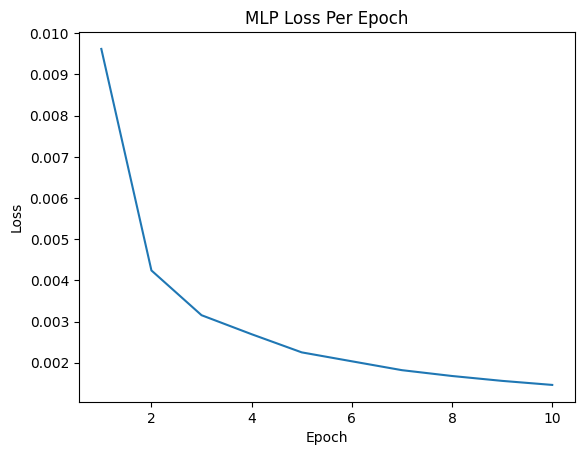

In [4]:
plt.plot(range(1, n_epochs + 1), losses)
plt.title('MLP Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

---
## 第三部分：基于`CNN`的手写数字分类

- 请你构建一个卷积神经网络模型，在Mnist数据集上进行训练和测试。
- 可以使用`Pytorch`或者`Tensorflow`等深度学习框架。
- 请你展示模型的训练过程（Loss曲线）和测试结果（分类精度）。

### 评分细则
- 模型构建：10分
- 模型训练：10分 - 要求Loss曲线收敛
- 模型测试：10分 - 要求分类精度达到95%以上

In [5]:
# Code here
from data import LoadData
from CNN import CNN
import torch.nn as nn
import torch
from tqdm import tqdm
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

train_data = LoadData(train=True)
test_data = LoadData(train=False)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

model = CNN()

# n_epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

best_loss = 1e5
losses = []

start_time = time()
for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for i, (images, labels) in tqdm(enumerate(train_loader)):
        optimizer.zero_grad()  # Assuming 'optimizer' is defined
        predictions = model(images)
        loss = criterion(predictions, labels)  # Assuming 'loss_function' is defined
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    average_train_loss = train_loss / len(train_data)
    losses.append(average_train_loss)
    print(f"Epoch {epoch+1}, Loss: {average_train_loss}")

    if train_loss < best_loss:
        best_loss = train_loss
        torch.save(model.state_dict(), 'best_model_cnn.pth')
end_time = time()
print(f"Training time cnn: {end_time - start_time}")

model.load_state_dict(torch.load('best_model_cnn.pth'))
model.eval()
test_failures = 0
for i, (images, labels) in tqdm(enumerate(test_loader)):
    predictions = model(images)
    test_failures += sum(predictions.argmax(1) != labels).item()

test_accuracy = 1 - test_failures / len(test_data)
print(f"Test accuracy: {100*test_accuracy:.2f}%") 
# epoch     accuracy  
# 10         98.62%

1875it [00:23, 81.43it/s]


Epoch 1, Loss: 0.01510065646081542


1875it [00:23, 79.30it/s]


Epoch 2, Loss: 0.004629209495537604


1875it [00:26, 72.02it/s]


Epoch 3, Loss: 0.00300748361775962


1875it [00:29, 63.14it/s]


Epoch 4, Loss: 0.0023171116039777794


1875it [00:29, 62.53it/s]


Epoch 5, Loss: 0.0019390223631460684


1875it [00:28, 66.61it/s]


Epoch 6, Loss: 0.0016707313428380682


1875it [00:28, 66.94it/s]


Epoch 7, Loss: 0.0015263928630719116


1875it [00:28, 66.13it/s]


Epoch 8, Loss: 0.0013792354531911163


1875it [00:29, 64.45it/s]


Epoch 9, Loss: 0.0012768737766464863


1875it [00:26, 69.51it/s]


Epoch 10, Loss: 0.0011644146655729855
Training time cnn: 273.00378918647766


313it [00:02, 137.55it/s]

Test accuracy: 98.62%


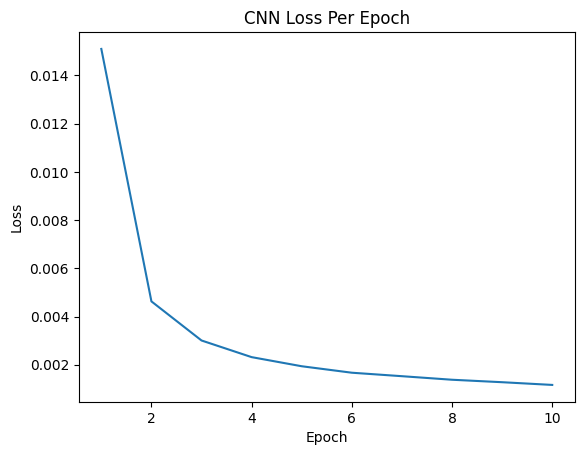

In [6]:
plt.plot(range(1, n_epochs + 1), losses)
plt.title('CNN Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [7]:
# unseen data
import os
mlp_model = MLP()
cnn_model = CNN()
mlp_model.load_state_dict(torch.load('best_model_mlp.pth'))
cnn_model.load_state_dict(torch.load('best_model_cnn.pth'))

file_path = 'unseen'
for dir, _, files in os.walk(file_path):
    img_names = files
    break
labels = [int(name[7]) for name in img_names]
# print('img_names:', img_names, 'labels:', labels)
img_paths = [os.path.join(file_path, name) for name in img_names]

pred_exact_mpl = 0
pred_exact_cnn = 0
for (path, label) in zip(img_paths, labels):
    input = torch.tensor(plt.imread(path)) / 255.0
    mlp_prediction = mlp_model(input)
    cnn_prediction = cnn_model(input.unsqueeze(0))

    print('mlp_prediction:', mlp_prediction.argmax().item(), 'cnn_prediction:', cnn_prediction.argmax().item(), 'label:', label)
    if mlp_prediction.argmax().item() == label:
        pred_exact_mpl += 1
    if cnn_prediction.argmax().item() == label:
        pred_exact_cnn += 1

print(f"Accuracy mlp: {100*pred_exact_mpl/len(labels):.2f}%")
print(f"Accuracy cnn: {100*pred_exact_cnn/len(labels):.2f}%")


mlp_prediction: 9 cnn_prediction: 1 label: 1
mlp_prediction: 9 cnn_prediction: 4 label: 4
mlp_prediction: 5 cnn_prediction: 5 label: 5
mlp_prediction: 7 cnn_prediction: 7 label: 7
mlp_prediction: 9 cnn_prediction: 9 label: 9
Accuracy mlp: 60.00%
Accuracy cnn: 100.00%



---
## 第四部分：结果讨论与对比分析

- 请你对`MLP`和`CNN`两种模型的训练和测试结果进行对比分析。
- 你可以从模型的训练速度、模型的性能、模型的泛化能力等方面进行分析。
    - 训练速度：模型训练所需的时间
    - 模型性能：模型在测试集上的分类精度
    - 模型泛化能力：模型在未知数据上的表现，未知数据可以从Canvas上下载，在文件夹`unseen`中有5张手写数字图片。
- 请在下面的markdown cell中写下你的分析结果。

### 评分细则
- 结果讨论与对比分析：
    - 训练速度：4分
    - 模型性能：4分
    - 模型泛化能力：5分
    - 其他：2分

### 训练速度
---
从训练时间对比，可以明显观察到，在相同的epoch (10)下，CNN需要明显更长的时间进行训练。
| MLP | CNN |
|:---:|:---:|
| 62.10 s | 273.00 s|

分析：
- MLP一共包含218058个参数：
    - fc1: 784*256+256=200960
    - fc2: 256*64+64=16448
    - fc3: 64*10+10=650
    
- CNN一共包含50186个参数：
    - conv1: 1*32*3*3+32=320
    - conv2: 32*64*3*3+64=18496
    - fc: (64*7*7)*10+10=31370

尽管CNN的参数总数比MLP少，但是卷积操作本身更加复杂，每个卷积核都需要在输入数据的不同区域进行多次运算，这使得CNN消耗的计算量较大，计算时间更长。


### 模型性能
---

模型收敛后，在测试集上的性能虽然CNN效果更好，但是差距不大，只有0.46%的差距。
| MLP | CNN |
|:---:|:---:|
| 98.16% | 98.62% |

分析：这是因为mnist数据集本身比较简单，图片分别率较低且具有明显容易区分的特征，MLP已经足够识别出这些特征并实现较高的分类准确度。并且MLP的参数量更大，理论上具有较高的网络容量，容易学习到训练数据中的细节，从而可能在简单的数据集上表现良好。

### 泛化能力
---

可以观察到， CNN的泛化能力明显优于MLP，在unseen数据集上做到了百分百正确分类。
| MLP | CNN |
|:---:|:---:|
| 60% | 100% |

分析：因为CNN通过卷积层学习数据的层次特征，而非仅仅依赖输入的**原始像素**，从而能够捕捉图像的**空间层次结构**。也就是说，CNN能够有效的识别图片中的相似模式，实现对位置、缩放和其他几何变换的不变性。同时，mnist数据集中的图片具有高度的相似性，相同label的图片大多只是在位置，大小，微小的结构上有些变化。所以，这也解释了在一些新的数据上，CNN能够实现比MLP更好的结果。

### 其他
---

- 模型结构

    在构建MLP网络结构时，我对是否加入dropout层进行了考虑。
    首先，dropout的定义：
    >在训练神经网络的过程中，随机地将一部分神经元的输出值置为0，从而使得神经网络的结构变得不稳定，从而强制网络学习到更加鲁棒的特征表示。

    加入dropout层后，网络对unseen数据集的表现有稳定的提升，如下表所示：

    | with dropout | without dropout |
    |:---:|:---:|
    | 40% | 60% |

    另外，加入dropout层可以使得在一定epoch和一定概率下（因为dropout具有随机性），MLP在unseen数据集上达到80%的效果。

    这可能是因为dropout层的加入让神经网络学习到更加鲁棒的特征表示，从而提高模型的泛化能力，所以我选择将dropout层加入MLP网络中。

- learning rate（lr）的调整

    为了加快网络的收敛速度，并且为了使模型更好地收敛，我对lr进行了分析与挑选

    该表格展示了在三个不同lr下，在test上的分类效果达到95%需要的epoch数：

    | lr | 1e-3 | 3.33e-4 | 1e-4 |
    |:---:|:---:|:---:|:---:|
    | epoch | 4 | 2 | 1 |

    可见，1e-3具有最好的效果。

    该表格展示了在三个不同lr下，10个epoch后，在unseen数据集上的表现：

    | lr | 1e-3 | 3.33e-4 | 1e-4 |
    |:---:|:---:|:---:|:---:|
    | 泛化能力 | 60% | 40% | 20% |

    同样的，1e-3具有最好的效果，所以我选择lr=1e-3作为本实验MLP的设定。同理，我们选择lr=1e-4作为本实验cNN超参数的设定。